## Comparing annotation tools
#### Four random organisms run through EggNOG mapper and Prokka, both yielding COG

In [1]:
import gzip as gz
import pandas as pd
import matplotlib_venn as venn
from matplotlib import pyplot as plt

### Loading the premade annotation files
#### EggNOG

In [2]:
path = 'C:\\Users\\jenny\\Documents\\NTNU\\Master\\my_supplementary_data\\sequences\\annotation_tool_comparisons\\'
t1_egg = pd.read_excel(path + 'eggNOG_output\\actinomyces_canis_genomic_eggNOG.xlsx', header = 2)
t2_egg = pd.read_excel(path + 'eggNOG_output\\cellulomonas_fimi_nrs133_genomic_eggNOG.xlsx', header = 2)
t3_egg = pd.read_excel(path + 'eggNOG_output\\enterococcus_faecium_genomic_eggNOG.xlsx', header = 2)
t4_egg = pd.read_excel(path + 'eggNOG_output\\iodobacter_ciconiae_h11r3_genomic_eggNOG.xlsx', header = 2)

In [3]:
# dropping the last three rows, which contain data on the annotation job submission
t1_egg.drop(t1_egg.tail(3).index,inplace = True)
t2_egg.drop(t2_egg.tail(3).index,inplace = True)
t3_egg.drop(t3_egg.tail(3).index,inplace = True)
t4_egg.drop(t4_egg.tail(3).index,inplace = True)

In [4]:
eggnog = [t1_egg, t2_egg, t3_egg, t4_egg]

In [5]:
# result files had a column 'eggNOG_OGs' with several COG entries, separated by @ 
# will fetch the first COG entry from this column and save to a new column, 'COG'
# the new format matches how the Prokka files report their COG terms

for i in range(0,len(eggnog)):
    eggnog[i]['COG'] = eggnog[i]['eggNOG_OGs'].str.split('@', n = 1).str[0]

#### Prokka

In [6]:
t1_prok = pd.read_table(path + 'prokka_output\\actinomyces_canis_genomic_prokka.tabular')
t2_prok = pd.read_table(path + 'prokka_output\\cellulomonas_fimi_nrs133_genomic_prokka.tabular')
t3_prok = pd.read_table(path + 'prokka_output\\enterococcus_faecium_genomic_prokka.tabular')
t4_prok = pd.read_table(path + 'prokka_output\\iodobacter_ciconiae_h11r3_genomic_prokka.tabular')

In [7]:
prokka = [t1_prok, t2_prok, t3_prok, t4_prok]

### Comparing

In [9]:
# listing all COGs
COG_1 = pd.DataFrame()
COG_1['allCOGs'] = eggnog[0]['COG'].append(prokka[0]['COG']).dropna().drop_duplicates().reset_index(drop = True)

In [10]:
# for each species, generate overlap counts for COGs within Prokka and/or eggNOG

counts = {}
labels = ('EggNOG', 'Prokka')

for i in range(0, len(eggnog)):
    # create dataframe for all unique COGs reported for species i
    COG = pd.DataFrame()
    COG['allCOGs'] = eggnog[i]['COG'].append(prokka[i]['COG']).dropna().drop_duplicates().reset_index(drop = True)
    
    # create three new columns which will inform on where each COG can be found (1 = yes, 0 = no (default))
    COG['inEggNOG'] = 0
    COG['inProkka'] = 0
    COG['inBoth'] = 0

    # add 1 to the cells depending on where the COG is mentioned (only EggNOG, only Prokka, or both)
    for r in range(0,len(COG_1)):
        if eggnog[i]['COG'].str.contains(COG_1['allCOGs'][r]).sum() >= 1:     # In EggNOG ...
            if prokka[i]['COG'].str.contains(COG_1['allCOGs'][r]).sum() >= 1:  # ...and Prokka.
                COG.loc[r,'inBoth'] = 1
            else:
                COG.loc[r,'inEggNOG'] = 1                                       # ... but not Prokka.
        elif prokka[i]['COG'].str.contains(COG_1['allCOGs'][r]).sum() >= 1:   # Not in EggNOG, but in Prokka.
            COG.loc[r,'inProkka'] = 1
    
    # add the counts of each placement to the dictionary 
    counts[i] = (COG.inEggNOG.sum(), COG.inProkka.sum(), COG.inBoth.sum())

counts

{0: (610, 8, 637), 1: (368, 5, 667), 2: (249, 3, 471), 3: (218, 4, 597)}

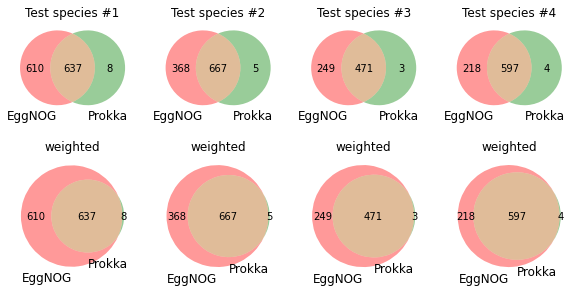

In [11]:
# plotting comparison for all test species
labels = ('EggNOG', 'Prokka')

fig, axs = plt.subplots(2,4, figsize = (10,5))
plt.title('COG term overlaps')

plt.sca(axs[0,0])
venn.venn2_unweighted(subsets = counts[0], set_labels = labels)
plt.title('Test species #1')

plt.sca(axs[0,1])
venn.venn2_unweighted(subsets = counts[1], set_labels = labels)
plt.title('Test species #2')

plt.sca(axs[0,2])
venn.venn2_unweighted(subsets = counts[2], set_labels = labels)
plt.title('Test species #3')

plt.sca(axs[0,3])
venn.venn2_unweighted(subsets = counts[3], set_labels = labels)
plt.title('Test species #4')

plt.sca(axs[1,0])
venn.venn2(subsets = counts[0], set_labels = labels)
plt.title('weighted')

plt.sca(axs[1,1])
venn.venn2(subsets = counts[1], set_labels = labels)
plt.title('weighted')

plt.sca(axs[1,2])
venn.venn2(subsets = counts[2], set_labels = labels)
plt.title('weighted')

plt.sca(axs[1,3])
venn.venn2(subsets = counts[3], set_labels = labels)
plt.title('weighted')

plt.show()